In [66]:
import pandas as pd
import numpy as np

In [67]:
df=pd.read_csv(r'D:\UOP\4th year\Research\EDA\Data\cancat.csv')

In [68]:
df

,No,Region,District,D/S Office,Date of Death,Cause of Death,Sex,Age,Age Category
0,1,Southern,Monaragala,Kataragama,2010-01-01,Body destroyed,Male,50-55,Subadults and adults
1,2,Southern,Monaragala,Thanamalvila,2010-01-07,Unknown,Male,20,Subadults and adults
2,3,North Western,Anuradhapura,Unknown,2010-01-08,Electrocuted,Male,30-35,Subadults and adults
3,4,Eastern,Ampara,Thirikkovil,2010-01-12,Gunshot,Female,15-20,Subadults and adults
4,5,North Western,Kurunegala,Ipologama,2010-01-15,Accident,Male,5,Juvenile
...,...,...,...,...,...,...,...,...,...
1889,1890,Elephant Transit Home,Ratnapura,Unknown,2017-12-28,Natural,Female,Unknown,Unknown
1890,1891,Southern,Ratnapura,Weligepola,2017-12-28,Body destroyed,Male,25,Subadults and adults
1891,1892,Anuradhapura,Anuradhapura,Kabithigollawa,2017-12-28,Body destroyed,Female,20,Subadults and adults
1892,1893,Trincomalee,Trincomalee,Kanthale,2017-12-29,Electrocuted,Unknown,25-30,Subadults and adults


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   No              1894 non-null   int64 
 1   Region          1894 non-null   object
 2   District        1894 non-null   object
 3   D/S Office      1894 non-null   object
 4   Date of Death   1894 non-null   object
 5   Cause of Death  1894 non-null   object
 6   Sex             1894 non-null   object
 7   Age             1894 non-null   object
 8   Age Category    1894 non-null   object
dtypes: int64(1), object(8)
memory usage: 133.3+ KB


In [70]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'
# Replace 'your_data.csv' with the actual path or URL to your dataset file if needed
# df = pd.read_csv('your_data.csv')

# Calculate summary statistics for numerical columns
numerical_summary = df.describe()

# Calculate frequency counts for categorical columns
categorical_summary = df.select_dtypes(include=['object']).apply(pd.Series.value_counts)

# Print the summary statistics
print("Summary Statistics for Numerical Columns:")
print(numerical_summary)

print("\nSummary Statistics for Categorical Columns:")
print(categorical_summary)


Summary Statistics for Numerical Columns:
                No
count  1894.000000
mean    947.500000
std     546.895023
min       1.000000
25%     474.250000
50%     947.500000
75%    1420.750000
max    1894.000000

Summary Statistics for Categorical Columns:
               Region  District  D/S Office  Date of Death  Cause of Death  \
 20-25            NaN       NaN         NaN            NaN             NaN   
 5 - 6            NaN       NaN         NaN            NaN             NaN   
 8 - 10           NaN       NaN         NaN            NaN             NaN   
0.5 Months        NaN       NaN         NaN            NaN             NaN   
01                NaN       NaN         NaN            NaN             NaN   
...               ...       ...         ...            ...             ...   
serunuwara        NaN       NaN         4.0            NaN             NaN   
siyabalanduwa     NaN       NaN         2.0            NaN             NaN   
unknown           NaN       NaN         

In [71]:
#pip install statsmodels


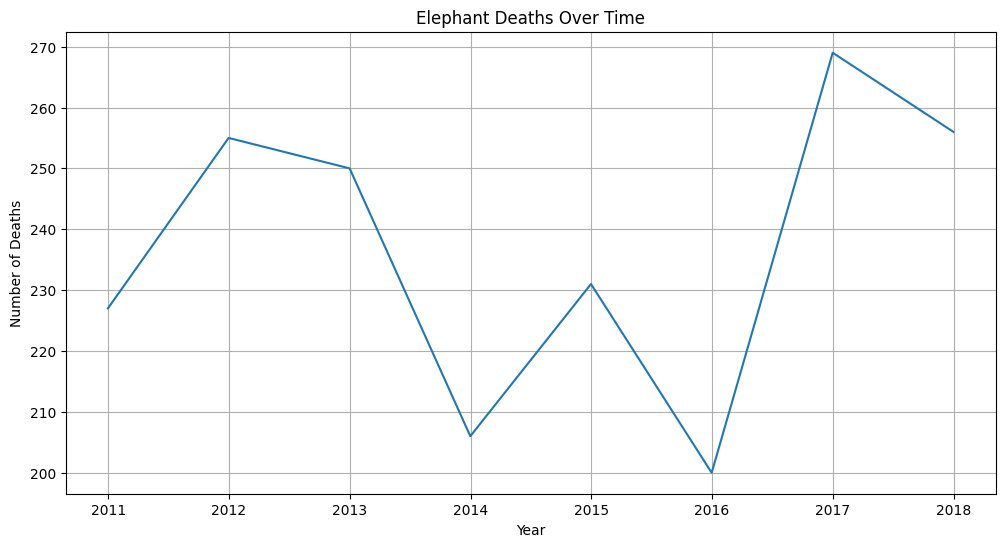

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


df['Date of Death'] = pd.to_datetime(df['Date of Death'])

# Set the 'Date of Death' column as the index for time series analysis
DF=df.set_index('Date of Death', inplace=False)

# Resample the data to get the count of elephant deaths by year
elephant_deaths_by_year = DF['No'].resample('Y').count()

# Plot the time series of elephant deaths over the years
plt.figure(figsize=(12, 6))
plt.plot(elephant_deaths_by_year)
plt.title('Elephant Deaths Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()




+ Convert the 'Date of Death' column to a datetime format and set it as the index for time series analysis.
+ Resample the data to get the count of elephant deaths by year.
+ Plot the time series of elephant deaths over the years.

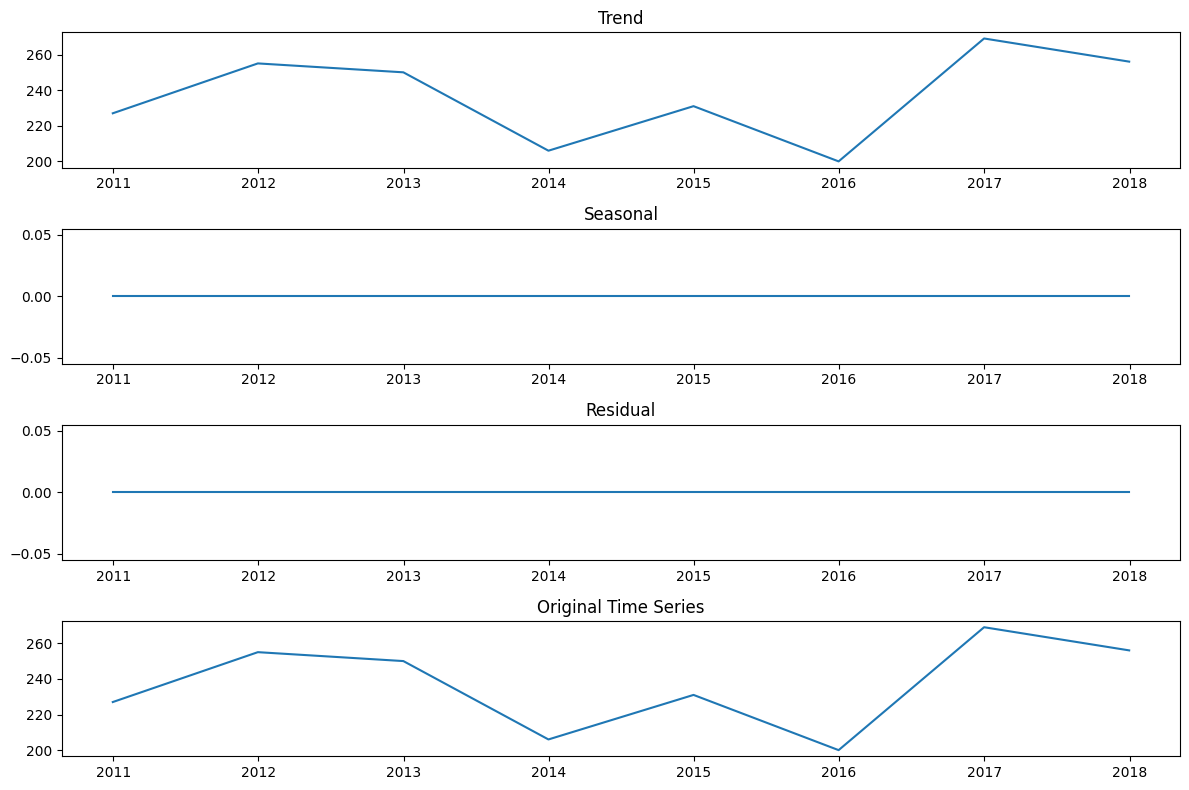

In [73]:
# Decompose the time series to identify trends and seasonality
decomposition = seasonal_decompose(elephant_deaths_by_year, model='additive')

# Plot the decomposed components (trend, seasonal, and residual)
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.subplot(412)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')
plt.subplot(413)
plt.plot(decomposition.resid)
plt.title('Residual')
plt.subplot(414)
plt.plot(elephant_deaths_by_year)
plt.title('Original Time Series')
plt.tight_layout()
plt.show()

+ Decompose the time series into trend, seasonal, and residual components using seasonal decomposition.
+ Plot the decomposed components to visualize any underlying patterns.

+ By resampling data at a monthly frequency,  can better capture any monthly seasonality patterns, trends, or variations in elephant deaths

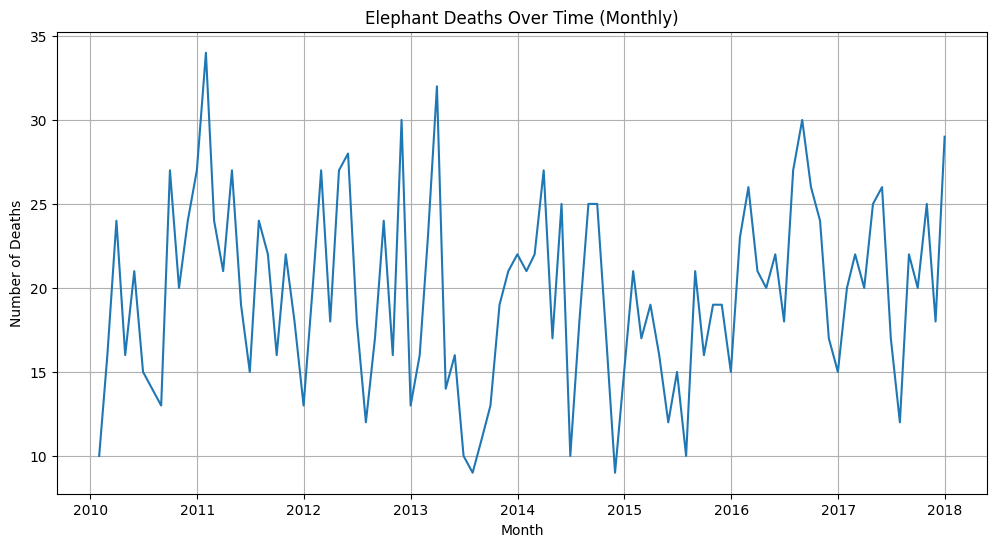

In [76]:
# Resample the data to get the count of elephant deaths by month
elephant_deaths_by_month = DF['No'].resample('M').count()

# Plot the time series of elephant deaths over the months
plt.figure(figsize=(12, 6))
plt.plot(elephant_deaths_by_month)
plt.title('Elephant Deaths Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()




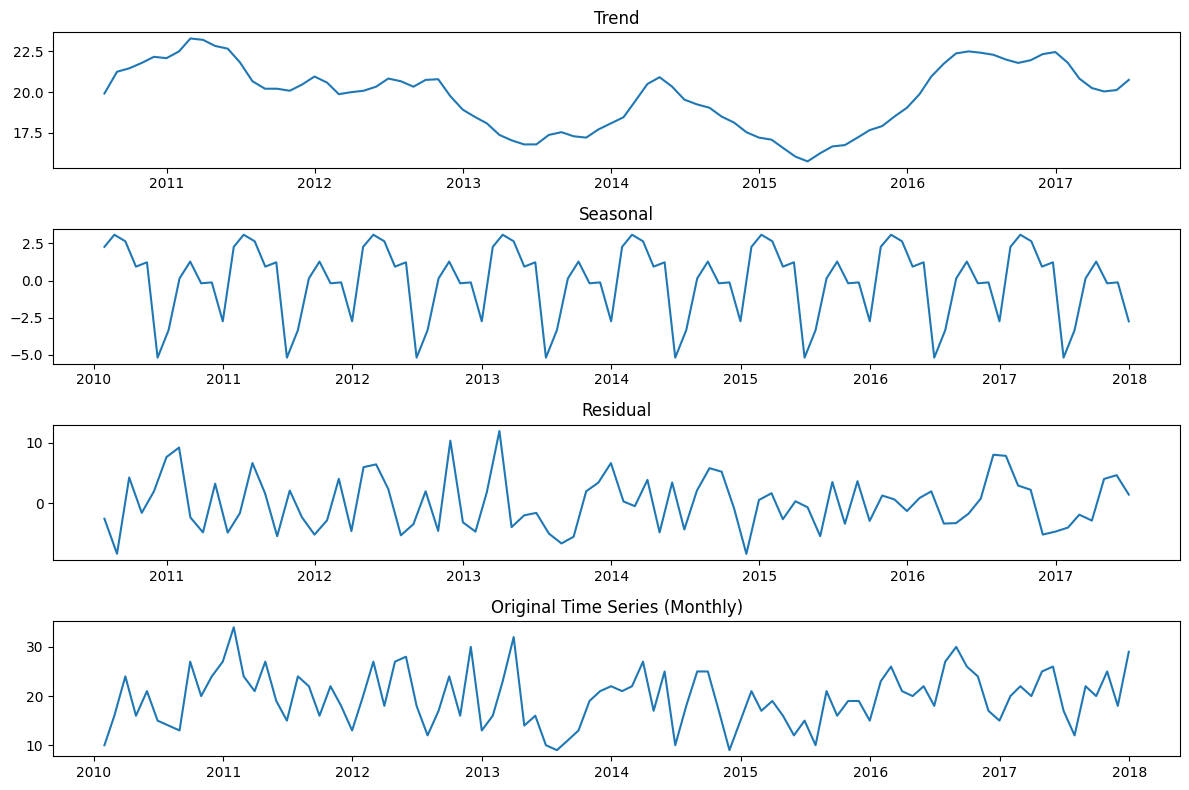

In [75]:
# Decompose the time series with monthly granularity
decomposition = seasonal_decompose(elephant_deaths_by_month, model='additive')

# Plot the decomposed components (trend, seasonal, and residual) for the monthly data
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.subplot(412)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')
plt.subplot(413)
plt.plot(decomposition.resid)
plt.title('Residual')
plt.subplot(414)
plt.plot(elephant_deaths_by_month)
plt.title('Original Time Series (Monthly)')
plt.tight_layout()
plt.show()

In [65]:
df

,No,Region,District,D/S Office,Cause of Death,Sex,Age,Age Category
Date of Death,,,,,,,,
2010-01-01,1,Southern,Monaragala,Kataragama,Body destroyed,Male,50-55,Subadults and adults
2010-01-07,2,Southern,Monaragala,Thanamalvila,Unknown,Male,20,Subadults and adults
2010-01-08,3,North Western,Anuradhapura,Unknown,Electrocuted,Male,30-35,Subadults and adults
2010-01-12,4,Eastern,Ampara,Thirikkovil,Gunshot,Female,15-20,Subadults and adults
2010-01-15,5,North Western,Kurunegala,Ipologama,Accident,Male,5,Juvenile
...,...,...,...,...,...,...,...,...
2017-12-28,1890,Elephant Transit Home,Ratnapura,Unknown,Natural,Female,Unknown,Unknown
2017-12-28,1891,Southern,Ratnapura,Weligepola,Body destroyed,Male,25,Subadults and adults
2017-12-28,1892,Anuradhapura,Anuradhapura,Kabithigollawa,Body destroyed,Female,20,Subadults and adults
